In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/e_commerce//


/content/drive/MyDrive/e_commerce


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
try:
    data = pd.read_csv('data.csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    try:
        data = pd.read_csv('data.csv', encoding='latin1')
    except UnicodeDecodeError:
        try:
            data = pd.read_csv('data.csv', encoding='ISO-8859-1')
        except UnicodeDecodeError:
            data = pd.read_csv('data.csv', encoding='cp1252')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data[['Quantity', 'UnitPrice', 'CustomerID']].describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
data.duplicated().sum()

5268

In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [11]:
data = data.dropna()

data = data.drop_duplicates()

In [12]:
data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [13]:
data['TotalCost'] = data['Quantity'] * data['UnitPrice']

rfm_df = data.groupby('CustomerID').agg({'InvoiceDate': 'max', 'InvoiceNo': 'count', 'TotalCost': 'sum'})
rfm_df.columns = ['LastPurchaseDate', 'Frequency', 'Monetary']
rfm_df['Recency'] = (rfm_df['LastPurchaseDate'].max() - rfm_df['LastPurchaseDate']).dt.days
rfm_df.drop('LastPurchaseDate', axis=1, inplace=True)
print(rfm_df.head())

            Frequency  Monetary  Recency
CustomerID                              
12346.0             2      0.00      325
12347.0           182   4310.00        1
12348.0            31   1797.24       74
12349.0            73   1757.55       18
12350.0            17    334.40      309


In [14]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


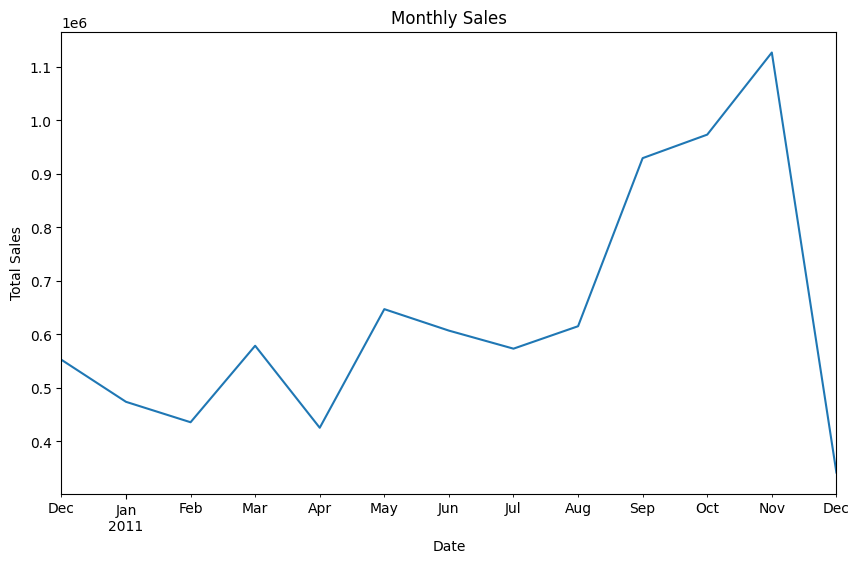

In [15]:
monthly_sales = data.set_index('InvoiceDate').resample('M')['TotalCost'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [16]:
customer_purchase_patterns = data.groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq='M')])['TotalCost'].sum()
print(customer_purchase_patterns.head())

CustomerID  InvoiceDate
12346.0     2011-01-31       0.00
12347.0     2010-12-31     711.79
            2011-01-31     475.39
            2011-04-30     636.25
            2011-06-30     382.52
Name: TotalCost, dtype: float64


In [17]:
basket = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
print(basket.head())

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                  0.0                             0.0   
536366                                  0.0                             0.0   
536367                                  0.0                             0.0   
536368                                  0.0                             0.0   
536369                                  0.0                             0.0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                      0.0                           0.0   
536366                      0.0                           0.0   
536367                      0.0                           0.0   
536368                      0.0                           0.0   
536369                      0.0                         

In [18]:
import nltk
from nltk.corpus import stopwords
import contractions
import spacy
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re


In [19]:
data['Description'] = data['Description'].str.lower()

In [20]:
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    else:
        return text

In [21]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    if isinstance(text, str):
        return ' '.join(word for word in text.split() if word.lower() not in stop_words)
    else:
        return ''

data['Description'] = data['Description'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def expand_contractions(text):
    return contractions.fix(text)

data['Description'] = data['Description'].apply(expand_contractions)

In [23]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_text(text):
    tokens = nltk.word_tokenize(text.lower())

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    return ' '.join(stemmed_tokens)

data['Description'] = data['Description'].apply(normalize_text)

In [24]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

data['Description'] = data['Description'].apply(remove_numbers)

In [25]:
data['Description']

0         white hang heart t-light holder
1                     white metal lantern
2           cream cupid heart coat hanger
3         knit union flag hot water bottl
4          red woolli hotti white heart .
                       ...               
541904              pack  spaceboy napkin
541905          child 's apron dolli girl
541906        children cutleri dolli girl
541907       children cutleri circu parad
541908           bake set  piec retrospot
Name: Description, Length: 401604, dtype: object

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from scipy.cluster.hierarchy import linkage


In [27]:
def preprocess_text(text):
    tokens = word_tokenize(text)

    tokens = [word.lower() for word in tokens if word.isalpha()]

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

data['Clean_Description'] = data['Description'].apply(preprocess_text)


In [28]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Clean_Description'])


In [31]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

data['Cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


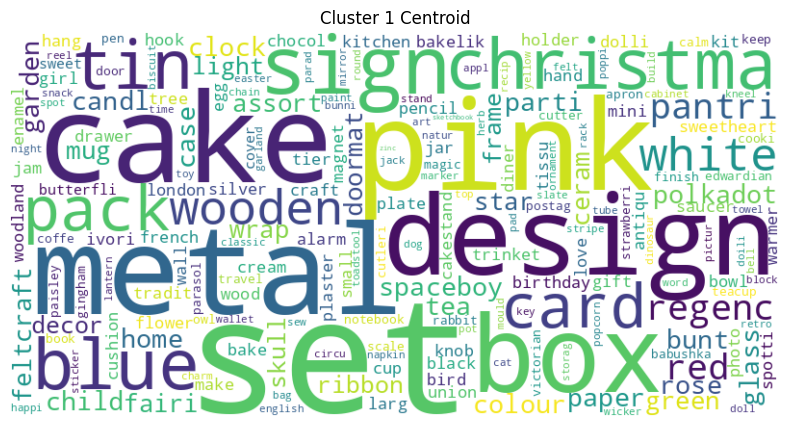

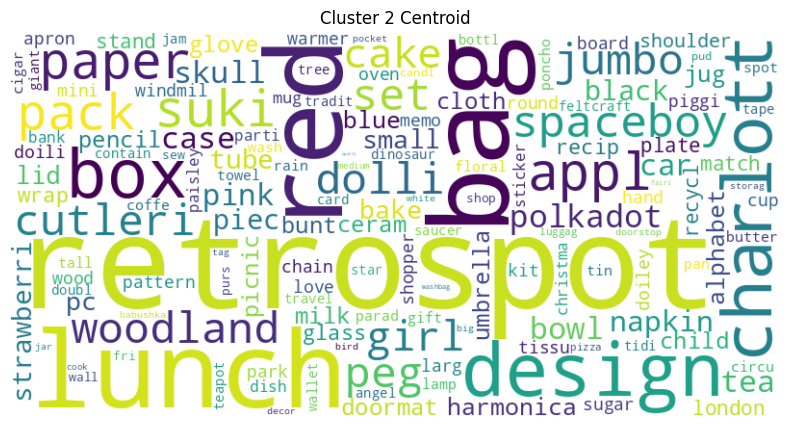

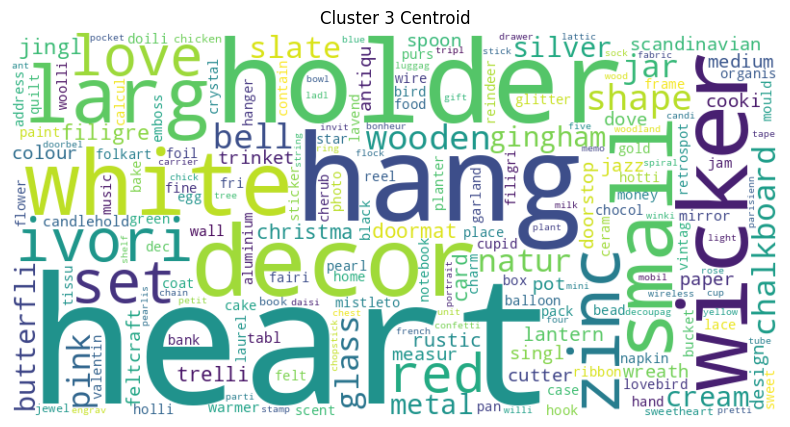

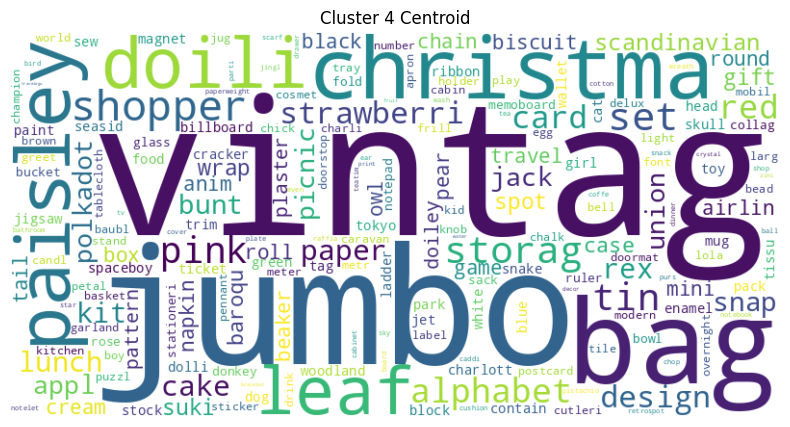

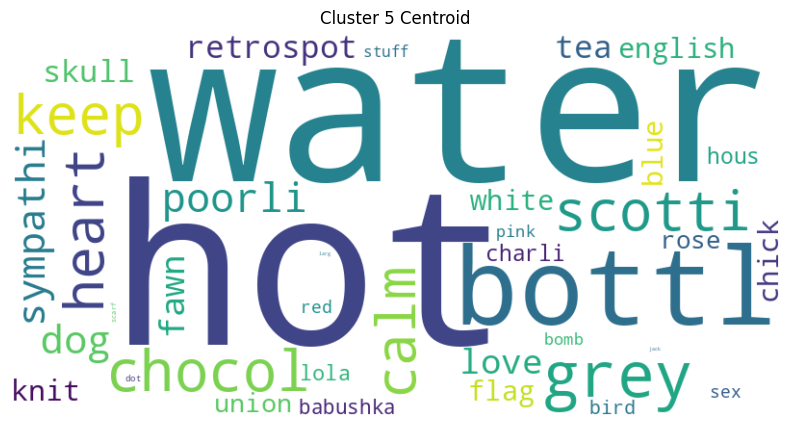

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_clouds_for_centroids(centroids, feature_names):
    num_clusters = centroids.shape[0]
    for i in range(num_clusters):
        word_freq = {feature_names[j]: centroids[i, j] for j in range(len(feature_names))}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Cluster {i+1} Centroid')
        plt.axis('off')
        plt.show()

feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

plot_word_clouds_for_centroids(cluster_centers, feature_names)

In [34]:
from sklearn.metrics import silhouette_score
